# Лабораторная работа 0
### _Студент: Чумасов Д.О._
### _Группа: М80-404Б._

## _Постановка задачи_
Требуется сформировать/получить два набора данных соответствующие следующим критериям:

Один из датасетов должен представлять собой корпус документов. Язык, источник и тематика произвольна
Второй датасет должен содержать категориальные, количественные признаки. Для данного датасета определить предсказываемые признаки (для задачи регрессии и классфикации). Если такого признака нет, спроектировать

Данные датасеты будут в дальнейшем использованы в оставшихся лабораторных работах. По каждому датасету построить распределения признаков (в случае корпуса документов – построить распределение слов) и объяснить имеющуюся картину. Вычислить статистические характеристики признаков. Обнаружить и решить возможные проблемы с данными. Если решить данную проблему невозможно, объяснить почему.
## _Библиотеки_

In [2]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sb

## _Задание 1. Работа с датасетом с категориальными и количественными признаками_
 "*Выбранный [датасет](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009) - набор данных о качестве вина*"

In [3]:
ad = pd.read_csv(r'E:\temp\winequality-red.csv')

**Вывод первых пяти строк датасета**

In [4]:
ad.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**Названия столбцов,их типы и краткая информация**

In [5]:
print(ad.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [6]:
print(ad.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


**Количественные данные по параметрам, медианы, стандартные отклонения, минимумы, кватили уровеней (0.25, 0.5, 0.75), максимумы**

In [7]:
ad.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**Построение графиков**

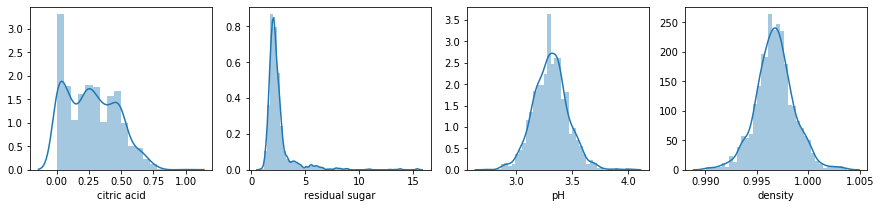

In [8]:
fig, axes = plt.subplots(1, 4, figsize= (15,3))
for (i,feature) in enumerate(['citric acid', 'residual sugar', 'pH', 'density']):
    sb.distplot(ad[feature], ax=axes[i])

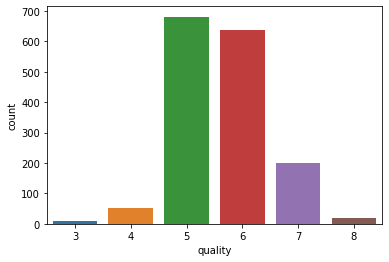

In [9]:
sb.countplot(x='quality', data=ad)

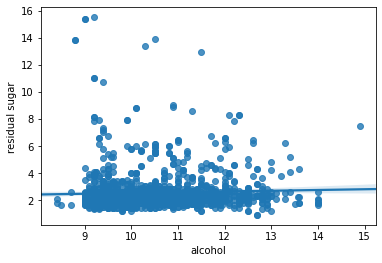

In [10]:
sb.regplot(x='alcohol', y='residual sugar', data=ad)

## _Задание 2. Работа с корпусом текстовых доументов._
 "*Выбранный [корпус](https://www.kaggle.com/enikolov/reviews-tripadvisor-hotels-and-edmunds-cars) документов - отзывы на отели в таких городах, как: Чикаго, Лас-Вегас, Дубаи, Лондон, Пекин.*"

In [11]:
import nltk
import os
from collections import Counter
directory = 'E:/temp/data/OpinRankDatasetWithJudgments/hotels/data/chicago/'
files = os.listdir(directory)

text = ''
for file in files:
    hotel = open(directory+file, 'r')
    for line in hotel:
        text += line

tokens = nltk.word_tokenize(text)
c = Counter(tokens)
most = dict(c.most_common(30))
for i in ',.!':
    most.pop(i)
most

{'the': 171302,
 'and': 105905,
 'a': 92005,
 'to': 77962,
 'was': 71717,
 'I': 56177,
 'in': 48777,
 'of': 44066,
 'for': 38584,
 'The': 38545,
 'is': 37708,
 'hotel': 35886,
 'room': 31636,
 'it': 28349,
 'we': 27554,
 'at': 26227,
 'were': 24420,
 'on': 23693,
 'that': 23686,
 'with': 23226,
 'but': 22598,
 'you': 19786,
 'very': 19374,
 'had': 19357,
 'not': 18250,
 'We': 17820,
 ')': 17331}

**Построение соответствующей гистограммы**

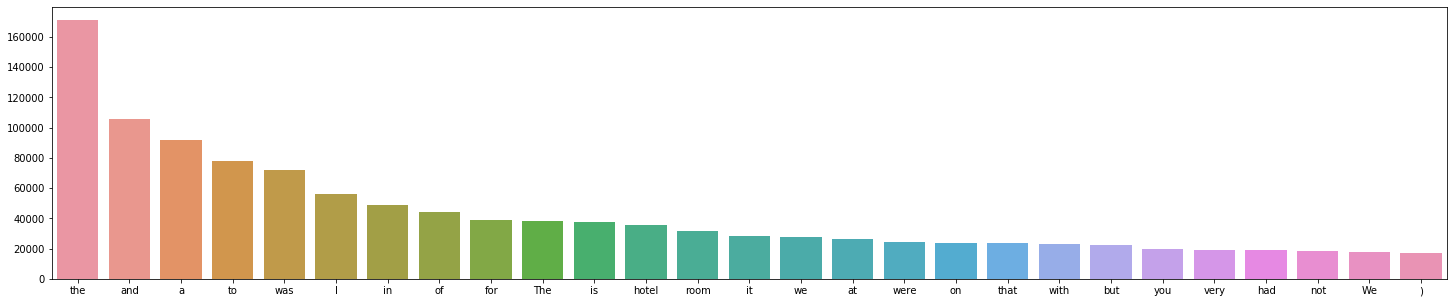

In [13]:
from pylab import rcParams
rcParams['figure.figsize'] = 25, 5
data = {'x':[], 'y':[]}
for label, coord in most.items():
    data['x'].append(label)
    data['y'].append(coord)
sb.barplot(x = data['x'], y = data['y'])

## Вывод: 
** С помощью простых команд и построения графиков можно определить общие и очевидные зависимости, но для более значимой и полезной информации придется разработать более сложные алгоритмы машинного обучения. **